### Link where the file is posted
https://github.com/vishalbharti1990/Data_visualization.git 
nb viewer link 
https://nbviewer.jupyter.org/github/vishalbharti1990/Data_visualization/blob/master/Data_visualization_tutorial.ipynb
Vishal Bharti, Email-ID: vrbharti1990@gmail.com

# __A tutorial of ggplot2 R library using the Haberman's Survival Data Set__ 

### The ggplot2 plotting package in R allow us to create rich visualization and provide us an array of tools to modify them as per our requirements. 

### <hr> Importing the library

In [1]:
library(ggplot2)

### <hr> Importing the dataset and organizing it

In [2]:
d <- read.csv('http://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data')
names(d) <- c('Age_at_time_of_op','Patient_year_of_op','No_of_pos_ax_nodes','Survival_over_5years')
head(d)

,Age_at_time_of_op,Patient_year_of_op,No_of_pos_ax_nodes,Survival_over_5years
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
5,33,58,10,1
6,33,60,0,1


### <hr> Constructing a simple histogram

The ggplot2 package is an efficient and easy to implement graphics package in R. It comes with two types of plotting functions:

* The quickplot() function and
* The ggplot() function.

The quickplot function is really useful for quickly building some really simple plots and hence the name quickplot. Although, this function has really limited functionality and the ggplot function is used more often.

The example that follows shows how we can use ggplot to make a simple histogram. The two important parts of the ggplot function are:
* The aesthetics, these are used to specify the roles that the variables play in each graph. For a variable we can control where points appear, the color or shape of a point, the height of a bar, etc. 
* The geoms, these are used to specify the type of object that we want to construct. For example, geom_histogram is used to construct a histogram.

The statement below provides the dataset 'd' and the variable 'Age_at_time_of_op' as input and geom_histogram with the binwidth parameter is used to specify histogram as the object

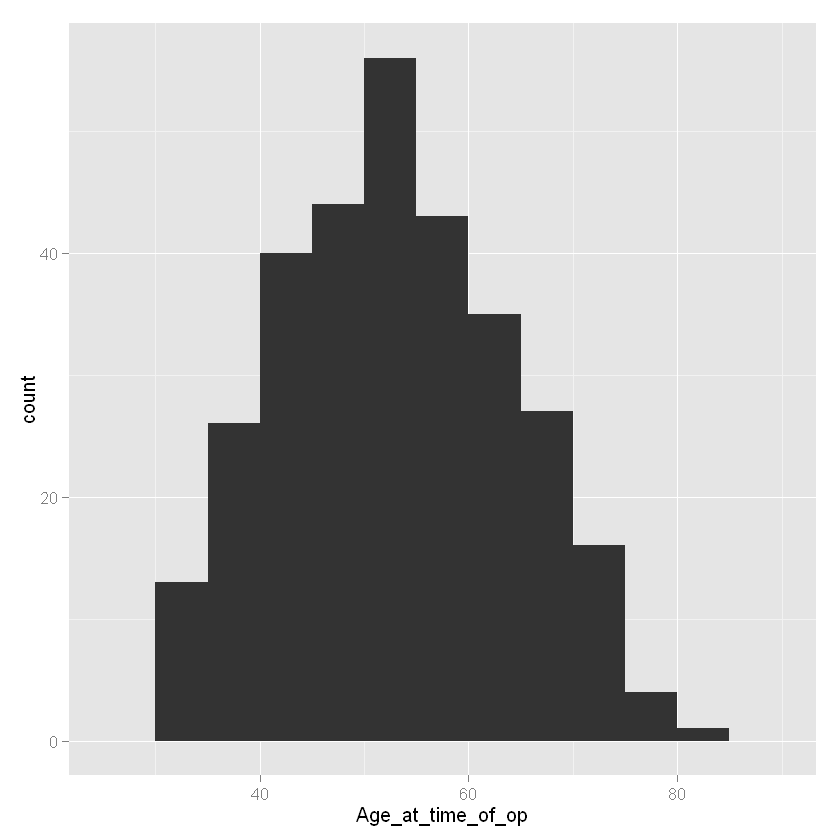

In [3]:
ggplot(data=d, aes(Age_at_time_of_op)) + geom_histogram(binwidth = 5)

### <hr> In the histogram constructed above, we can't discern any bin boundaries and the X-axis label is just the name of the variable. We can improve upon that by adding bin boudaries, a different fill-color and transparency.

* We use the 'color' parameter inside geom to add bin boundaries and the 'fill' parameter to change the fill color of the object.
* The 'breaks' parameter is used to specify the range in which the bins are displayed and the step after each bin.
* The alpha parameter ranges from 0 to 1 and is used to specify the transparency.
* The xlab or ylab parameter is used to specify the X-axis or Y-axis label.

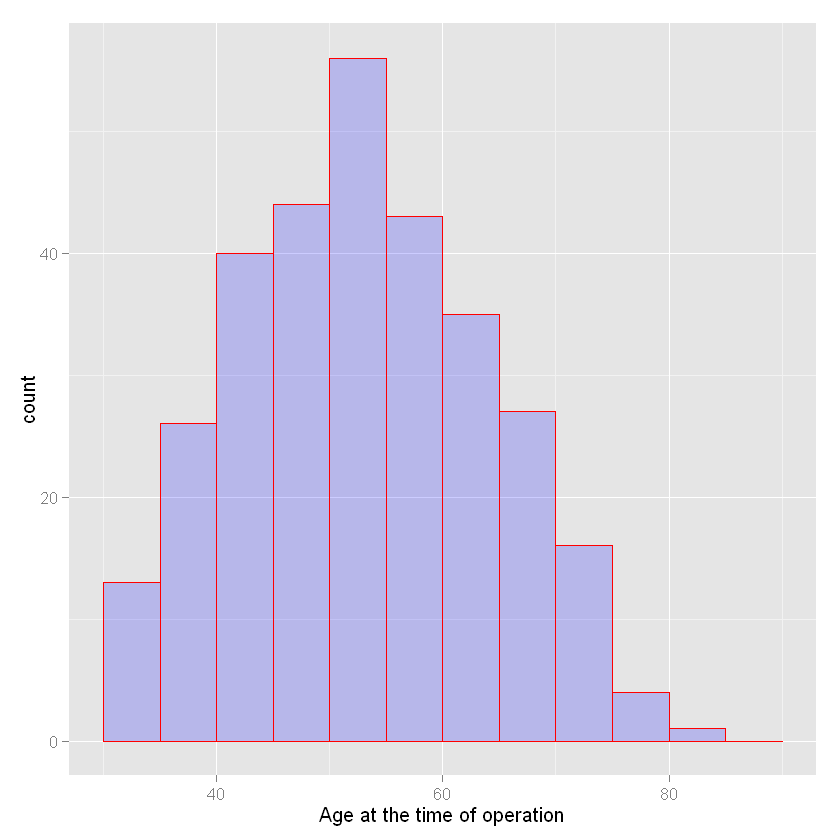

In [4]:
ggplot(data=d, aes(Age_at_time_of_op)) + geom_histogram(color = 'red',fill = 'blue', breaks=seq(30, 90, by=5), alpha = 0.2) + xlab('Age at the time of operation')

### <hr>Modifying color scale to highlight a variable

* We can also scale the color scale to depict a variable. We use the scaling function for this purpose, these are another important component of the ggplot function. 
* To scale the fill gradient we use the 'scale_fill_gradient' function. It take the color range and automatically generates a color scale based on a variable.
* In the case below it is just the 'Counts' for each value in X-axis. We need to specify this fill variable in the Geom function as well.

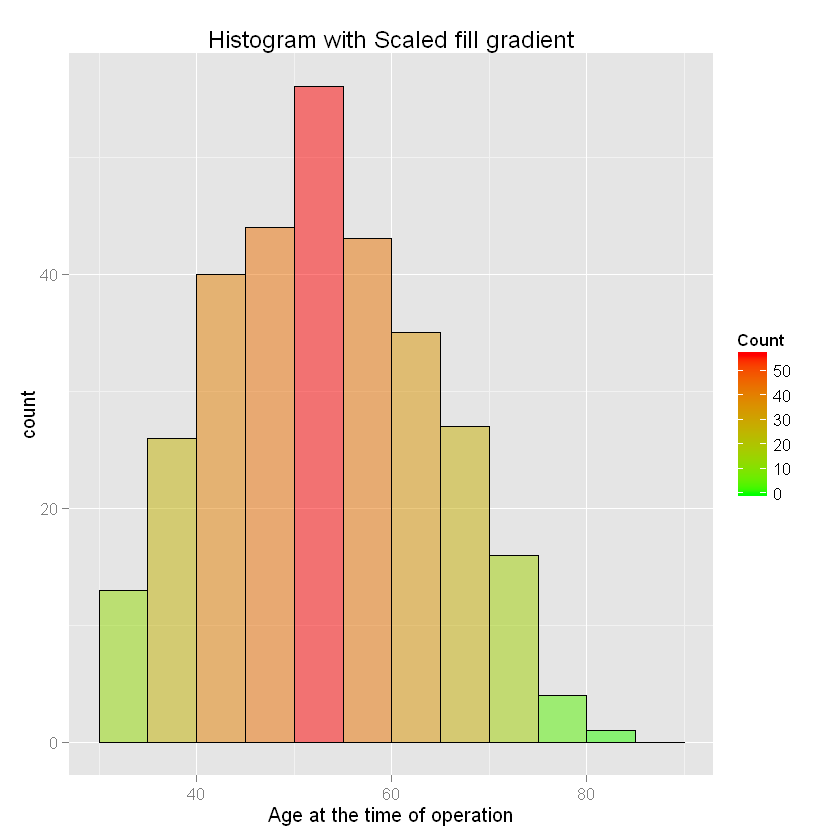

In [5]:
ggplot(data=d, aes(Age_at_time_of_op )) + geom_histogram(color = 'black',aes(fill = ..count..), alpha = 0.5 ,breaks=seq(30, 90, by=5)) + scale_fill_gradient("Count", low = "green", high = "red") + xlab('Age at the time of operation') + labs(title = "Histogram with Scaled fill gradient")

### <hr> Another important visualization of ggplot is the scatter plot

* A scatterplot in ggplot can be done by using the geom_point and geom_jitter.
* geom_jitter is similar in functionality to the geom_point, but it randomly perturbes points.
* This can be useful when we have many overlapping points.
* We can use the shape aesthetics to highlight some features. In the example below, the X-axis and Y-axis represent two variables and the shape repersents the third variable.

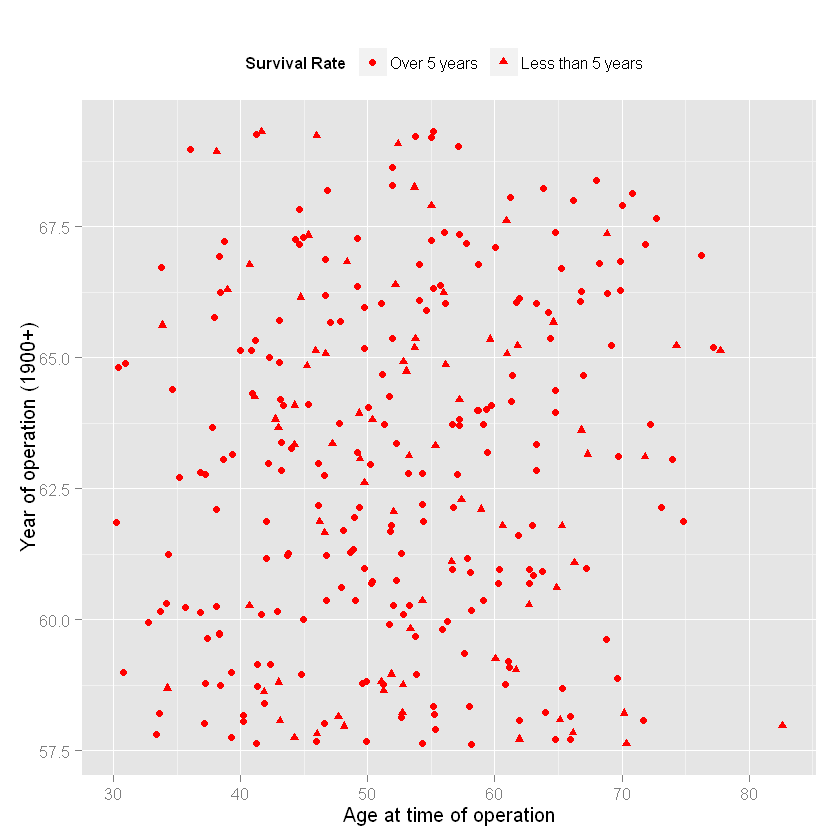

In [6]:
ggplot(d, aes(Age_at_time_of_op, Patient_year_of_op)) + geom_jitter(data = d, mapping = aes(shape = as.factor(Survival_over_5years)), color = "red")+ xlab('Age at time of operation') + ylab('Year of operation (1900+)') + scale_shape_discrete("Survival Rate",breaks=c("1","2"),labels = c("Over 5 years","Less than 5 years")) + theme(legend.position = 'top') 

## <hr> Adding color to represent another attribute

* We can also use color to represent a fourth variable
* scale_color_gradient is used to provide a continues color range
* In the example below the range is rainbow(6) and the color scale is shown as legend on the top

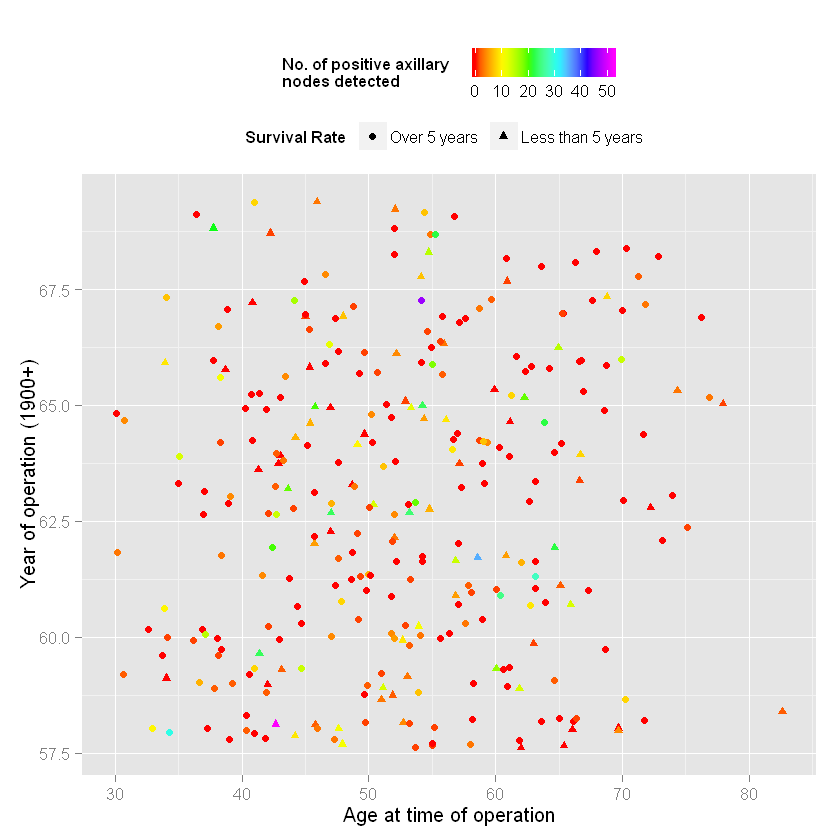

In [7]:
data2 = d
data2$Survival_over_5years = as.factor(data2$Survival_over_5years)
ggplot(data2, aes(Age_at_time_of_op, Patient_year_of_op, color = No_of_pos_ax_nodes)) + geom_jitter(data = data2, mapping = aes(shape = Survival_over_5years)) + xlab('Age at time of operation') + ylab('Year of operation (1900+)') + scale_color_gradientn(name = "No. of positive axillary \nnodes detected",colours = rainbow(6)) + scale_shape_discrete("Survival Rate",breaks=c("1","2"),labels = c("Over 5 years","Less than 5 years")) + theme(legend.position = 'top')

### <hr> Representing change as a flow

* The geom_smooth geom can be used to draw a smooth flowing pattern which shows how values change
* The blue lines in the center of the two flows represent the mean

geom_smooth: method="auto" and size of largest group is <1000, so using loess. Use 'method = x' to change the smoothing method.


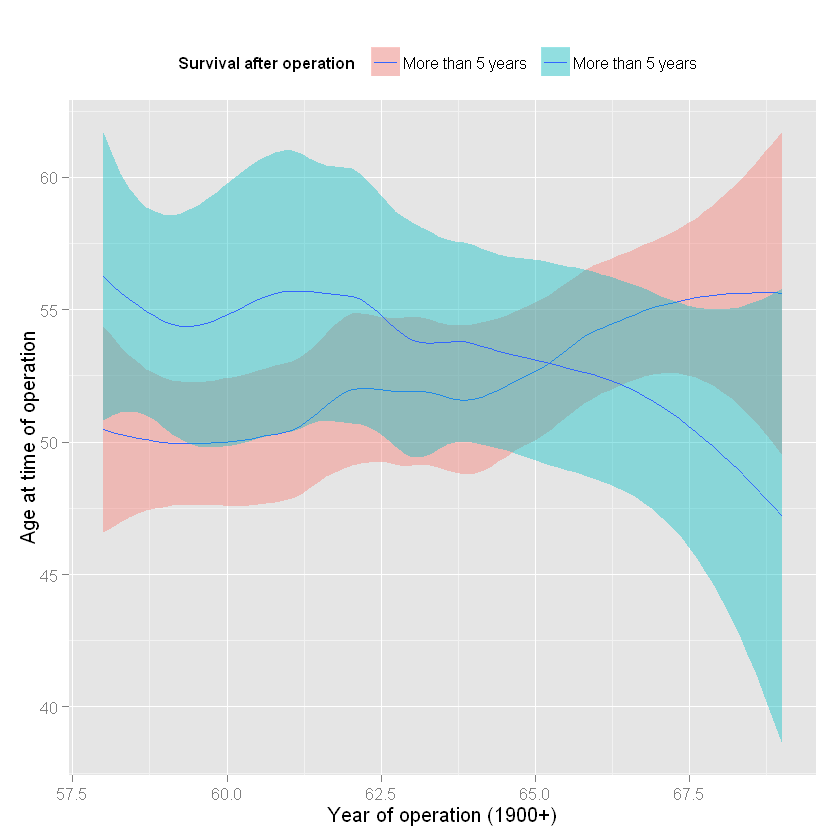

In [8]:
ggplot(d, aes( Patient_year_of_op, Age_at_time_of_op)) + geom_smooth(data = d, mapping = aes(fill = as.factor(Survival_over_5years))) + theme(legend.position = "top") + ylab('Age at time of operation') + xlab('Year of operation (1900+)') + scale_fill_discrete(name = "Survival after operation",breaks=c(1, 2),labels=c("More than 5 years", "More than 5 years"))